In [1]:
import pandas as pd
import numpy as np
from gower import gower_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [2]:
df = pd.read_csv("panic_disorder_dataset_training.csv")
df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [3]:
df.drop(["Participant ID","Age"],axis=1,inplace=True)

In [4]:
df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [5]:
df.drop(["Panic Disorder Diagnosis"],axis=1, inplace=True)

In [6]:
df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality
1,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality
2,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise
3,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise
4,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet
99996,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet
99997,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise
99998,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality


In [7]:
def fill_missing_with_random_sample(column):
    non_null_values = column.dropna()  
    if not non_null_values.empty:
        return column.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return column

columns_to_fill = ["Medical History", "Psychiatric History", "Substance Use"]  
df[columns_to_fill] = df[columns_to_fill].apply(fill_missing_with_random_sample)

In [8]:
df.isnull().sum()

Gender                 0
Family History         0
Personal History       0
Current Stressors      0
Symptoms               0
Severity               0
Impact on Life         0
Demographics           0
Medical History        0
Psychiatric History    0
Substance Use          0
Coping Mechanisms      0
Social Support         0
Lifestyle Factors      0
dtype: int64

### Codificamos algunas features

In [9]:
df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,High,Sleep quality
1,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality
2,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,Moderate,Exercise
3,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,Depressive disorder,Alcohol,Meditation,High,Exercise
4,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,Low,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Socializing,Low,Diet
99996,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,Drugs,Meditation,High,Diet
99997,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Drugs,Seeking therapy,Low,Exercise
99998,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality


In [10]:
## Features Si/no
yes_no_columns = ["Family History","Personal History"]
for col in yes_no_columns:
    df[col] = df[col].map({"Yes":1,"No":0})
df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,0,1,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,High,Sleep quality
1,Male,0,0,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality
2,Female,1,0,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,Moderate,Exercise
3,Female,0,0,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,Depressive disorder,Alcohol,Meditation,High,Exercise
4,Male,1,0,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,Low,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,1,0,High,Chest pain,Mild,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Socializing,Low,Diet
99996,Female,0,1,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,Drugs,Meditation,High,Diet
99997,Male,1,0,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Drugs,Seeking therapy,Low,Exercise
99998,Female,1,1,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality


In [11]:
## Ordinal Features
df_2 = df.copy()
ordinal_columns = ["Current Stressors","Social Support"]
for col in ordinal_columns:
    df[col] = pd.Categorical(df[col], categories=["Low","Moderate","High"], ordered=True)
    df[col] = df[col].cat.codes
df



,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,0,1,1,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,2,Sleep quality
1,Male,0,0,2,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,2,Sleep quality
2,Female,1,0,2,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,1,Exercise
3,Female,0,0,1,Chest pain,Moderate,Moderate,Rural,Diabetes,Depressive disorder,Alcohol,Meditation,2,Exercise
4,Male,1,0,1,Panic attacks,Mild,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,0,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,1,0,2,Chest pain,Mild,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Socializing,0,Diet
99996,Female,0,1,0,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,Drugs,Meditation,2,Diet
99997,Male,1,0,1,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Drugs,Seeking therapy,0,Exercise
99998,Female,1,1,2,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,2,Sleep quality


In [12]:
df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,0,1,1,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,2,Sleep quality
1,Male,0,0,2,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,2,Sleep quality
2,Female,1,0,2,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,1,Exercise
3,Female,0,0,1,Chest pain,Moderate,Moderate,Rural,Diabetes,Depressive disorder,Alcohol,Meditation,2,Exercise
4,Male,1,0,1,Panic attacks,Mild,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,0,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,1,0,2,Chest pain,Mild,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Socializing,0,Diet
99996,Female,0,1,0,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,Drugs,Meditation,2,Diet
99997,Male,1,0,1,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Drugs,Seeking therapy,0,Exercise
99998,Female,1,1,2,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,2,Sleep quality


In [13]:
df["Severity"] = pd.Categorical(df["Severity"], categories=["Mild","Moderate","Severe"], ordered=True)
df["Severity"] = df["Severity"].cat.codes

df["Impact on Life"] = pd.Categorical(df["Impact on Life"], categories=["Mild","Moderate","Significant"], ordered=True)
df["Impact on Life"] = df["Impact on Life"].cat.codes


df

,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
0,Male,0,1,1,Shortness of breath,0,0,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,2,Sleep quality
1,Male,0,0,2,Panic attacks,0,0,Urban,Asthma,Anxiety disorder,Drugs,Exercise,2,Sleep quality
2,Female,1,0,2,Panic attacks,0,2,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,1,Exercise
3,Female,0,0,1,Chest pain,1,1,Rural,Diabetes,Depressive disorder,Alcohol,Meditation,2,Exercise
4,Male,1,0,1,Panic attacks,0,1,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,0,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,1,0,2,Chest pain,0,0,Rural,Heart disease,Bipolar disorder,Drugs,Socializing,0,Diet
99996,Female,0,1,0,Panic attacks,2,0,Rural,Heart disease,Depressive disorder,Drugs,Meditation,2,Diet
99997,Male,1,0,1,Panic attacks,2,1,Rural,Heart disease,Bipolar disorder,Drugs,Seeking therapy,0,Exercise
99998,Female,1,1,2,Chest pain,2,0,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,2,Sleep quality


## Creamos la Matríz de Gower

In [14]:
### Creamos una muestra para evitar errores en la memoria
df_sampled, _ = train_test_split(df, test_size=0.95, random_state=42)

In [15]:
gower_dist = gower_matrix(df_sampled)
gower_df = pd.DataFrame(gower_dist, index=df_sampled.index, columns=df_sampled.index)
print(gower_df.head())


          56233     99016     87796     44516     66025     45913     81471  \
56233  0.000000  0.714286  0.500000  0.500000  0.857143  0.321429  0.392857   
99016  0.714286  0.000000  0.571429  0.642857  0.642857  0.607143  0.821429   
87796  0.500000  0.571429  0.000000  0.714286  0.571429  0.607143  0.321429   
44516  0.500000  0.642857  0.714286  0.000000  0.500000  0.464286  0.607143   
66025  0.857143  0.642857  0.571429  0.500000  0.000000  0.821429  0.607143   

          76674     17374     76502  ...     60263     44131     87498  \
56233  0.392857  0.535714  0.428571  ...  0.464286  0.500000  0.607143   
99016  0.750000  0.535714  0.714286  ...  0.607143  0.714286  0.535714   
87796  0.464286  0.678571  0.357143  ...  0.678571  0.714286  0.678571   
44516  0.464286  0.392857  0.571429  ...  0.535714  0.642857  0.464286   
66025  0.607143  0.535714  0.642857  ...  0.607143  0.500000  0.535714   

          37194     82386     6265      54886     76820     860       15795  
56

In [16]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="average")
df_sampled["Cluster"] = agg_clustering.fit_predict(gower_dist)

print(df_sampled[["Cluster"]].value_counts())


c:\Users\mokon\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
1          2057
0          1949
2           994
Name: count, dtype: int64


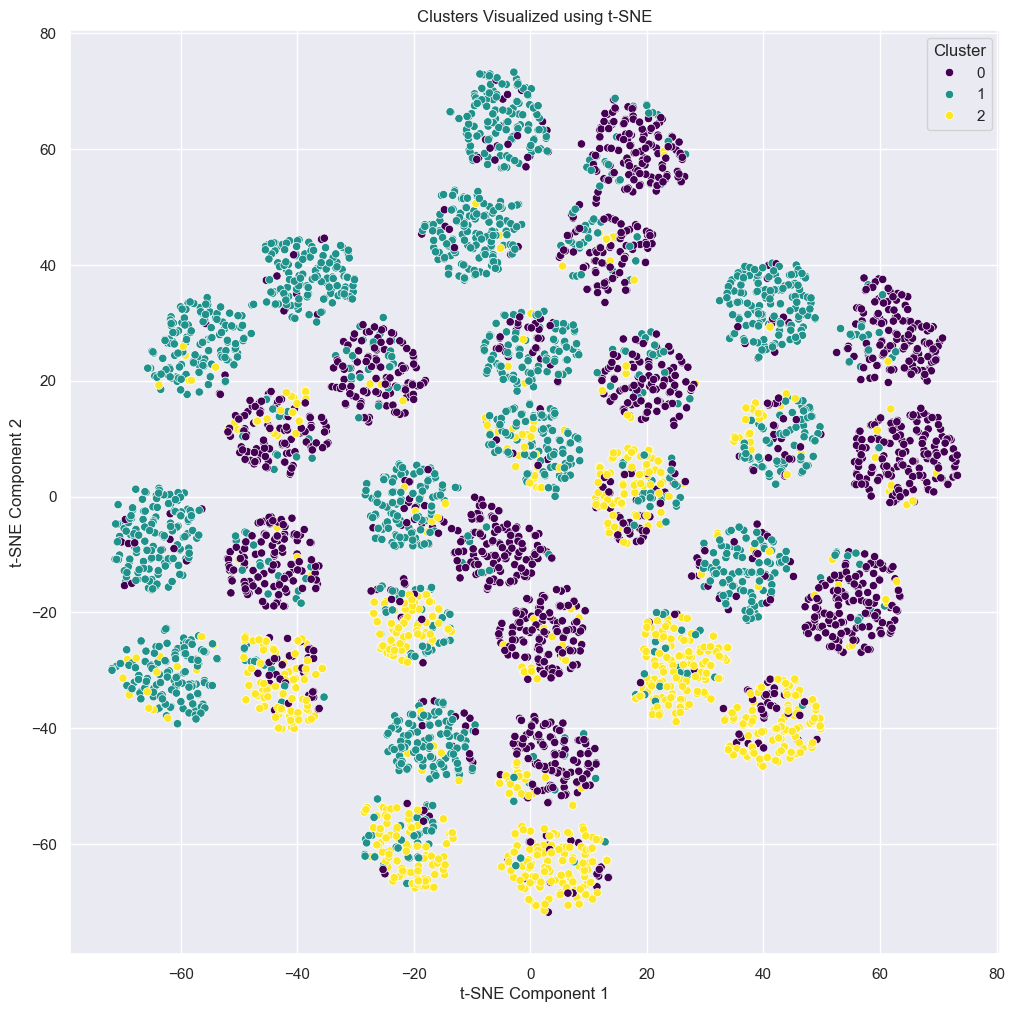

In [17]:
### Visualizamos los clusters
tsne = TSNE(n_components=2,perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(gower_dist)

plt.figure(figsize=(12,12))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_sampled["Cluster"],palette="viridis")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Clusters Visualized using t-SNE")
plt.legend(title="Cluster")
plt.show()

In [18]:
## Veamos la calidad de los clusters
score = silhouette_score(gower_dist, df_sampled["Cluster"], metric="precomputed")
print("Silhouette Score: {}".format(score))

Silhouette Score: 0.038897283375263214


In [19]:
for k in range(2,15):
    agg_clustering = AgglomerativeClustering(n_clusters=k, metric="precomputed",linkage="single")
    labels = agg_clustering.fit_predict(gower_dist)
    print("con {} clusters, Silhoutte scores de {}".format(k,silhouette_score(gower_dist, labels, metric='precomputed')))

con 2 clusters, Silhoutte scores de -0.010079807601869106
con 3 clusters, Silhoutte scores de -0.11904092133045197
con 4 clusters, Silhoutte scores de -0.18738801777362823
con 5 clusters, Silhoutte scores de -0.2110571265220642
con 6 clusters, Silhoutte scores de -0.24290144443511963
con 7 clusters, Silhoutte scores de -0.26226845383644104
con 8 clusters, Silhoutte scores de -0.2808407247066498
con 9 clusters, Silhoutte scores de -0.2864857017993927
con 10 clusters, Silhoutte scores de -0.2950669229030609
con 11 clusters, Silhoutte scores de -0.3128770887851715
con 12 clusters, Silhoutte scores de -0.31707003712654114
con 13 clusters, Silhoutte scores de -0.32588112354278564
con 14 clusters, Silhoutte scores de -0.3326799273490906


## Veamos si podemos hacer feature engineering


In [20]:
from sklearn.feature_selection import chi2

In [21]:
X = pd.get_dummies(df_sampled.drop(["Cluster"],axis=1))
y = df_sampled["Cluster"]
chi2_scores, p_values = chi2(X,y)
chi2_df = pd.DataFrame({"Feature":X.columns, "Chi2 Score":chi2_scores, "p-value":p_values})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False)
print(chi2_df)




                                    Feature   Chi2 Score        p-value
0                            Family History  1162.815442  3.146554e-253
6                             Gender_Female   445.752404   1.607294e-97
7                               Gender_Male   437.625329   9.351200e-96
1                          Personal History   228.453676   2.465554e-50
22                      Substance Use_Drugs   162.822401   4.401138e-36
21                    Substance Use_Alcohol   162.822401   4.401138e-36
18     Psychiatric History_Anxiety disorder    33.562341   5.152646e-08
20  Psychiatric History_Depressive disorder    17.660594   1.462348e-04
9                        Symptoms_Dizziness    12.819564   1.645383e-03
12             Symptoms_Shortness of breath    12.693285   1.752621e-03
15                   Medical History_Asthma    11.846770   2.676126e-03
19     Psychiatric History_Bipolar disorder    11.563321   3.083590e-03
24             Coping Mechanisms_Meditation    11.014796   4.056

In [22]:
selected_features = ["Family History","Demographics","Personal History","Gender","Impact on Life","Current Stressors","Substance Use"]
df_selected = df_sampled[selected_features]
df_selected

,Family History,Demographics,Personal History,Gender,Impact on Life,Current Stressors,Substance Use
56233,1,Urban,1,Female,2,1,Alcohol
99016,1,Urban,0,Male,0,0,Alcohol
87796,1,Urban,1,Male,2,0,Drugs
44516,1,Rural,0,Female,0,2,Drugs
66025,0,Rural,1,Male,0,2,Drugs
...,...,...,...,...,...,...,...
6265,0,Rural,1,Female,0,2,Drugs
54886,0,Rural,0,Male,2,2,Alcohol
76820,0,Urban,1,Male,0,0,Alcohol
860,0,Rural,0,Female,0,0,Drugs


In [23]:
gower_dist_selected = gower_matrix(df_selected)
for k in range(10,16):
    agg_clustering = AgglomerativeClustering(n_clusters=k, metric="precomputed",linkage="average")
    labels = agg_clustering.fit_predict(gower_dist_selected)
    print("con {} clusters, Silhoutte scores de {}".format(k,silhouette_score(gower_dist_selected, labels, metric='precomputed')))


con 10 clusters, Silhoutte scores de 0.26929575204849243
con 11 clusters, Silhoutte scores de 0.2961386740207672
con 12 clusters, Silhoutte scores de 0.3019772469997406
con 13 clusters, Silhoutte scores de 0.3247993588447571
con 14 clusters, Silhoutte scores de 0.32439669966697693
con 15 clusters, Silhoutte scores de 0.3488277494907379


In [24]:
agg_clustering = AgglomerativeClustering(n_clusters=10, metric="precomputed", linkage="average")
df_selected["Cluster"] = agg_clustering.fit_predict(gower_dist_selected)

print(df_selected[["Cluster"]].value_counts())

Cluster
0          785
2          627
1          619
4          610
5          472
3          452
9          446
6          347
7          335
8          307
Name: count, dtype: int64


C:\Users\mokon\AppData\Local\Temp\ipykernel_14160\1633095131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Cluster"] = agg_clustering.fit_predict(gower_dist_selected)


In [25]:
df_prueba = pd.read_csv("panic_disorder_dataset_training.csv")
df_sampled_prueba, _ = train_test_split(df_prueba, test_size=0.95, random_state=42)

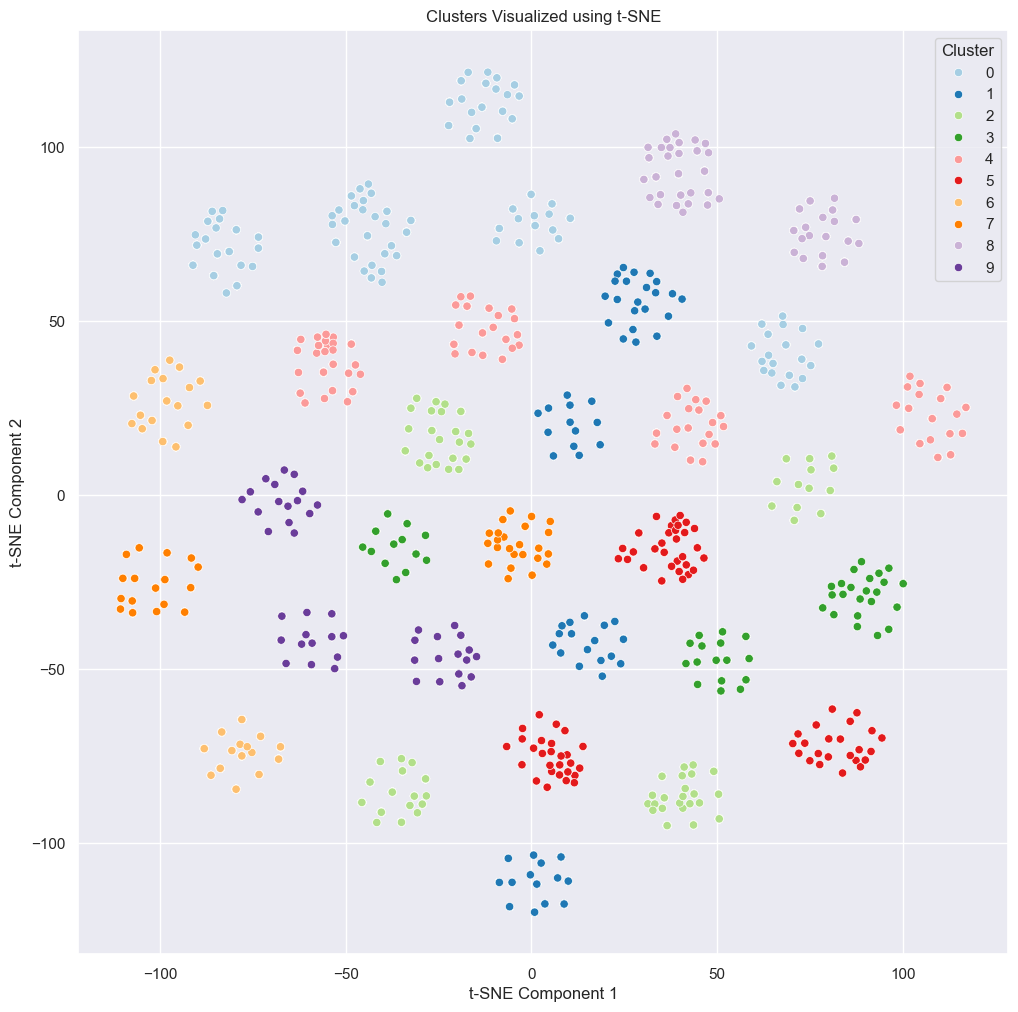

In [26]:
tsne = TSNE(n_components=2,perplexity=100,random_state=42)
X_tsne = tsne.fit_transform(gower_dist_selected)

plt.figure(figsize=(12,12))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_selected["Cluster"],palette="Paired")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Clusters Visualized using t-SNE")
plt.legend(title="Cluster")
plt.show()

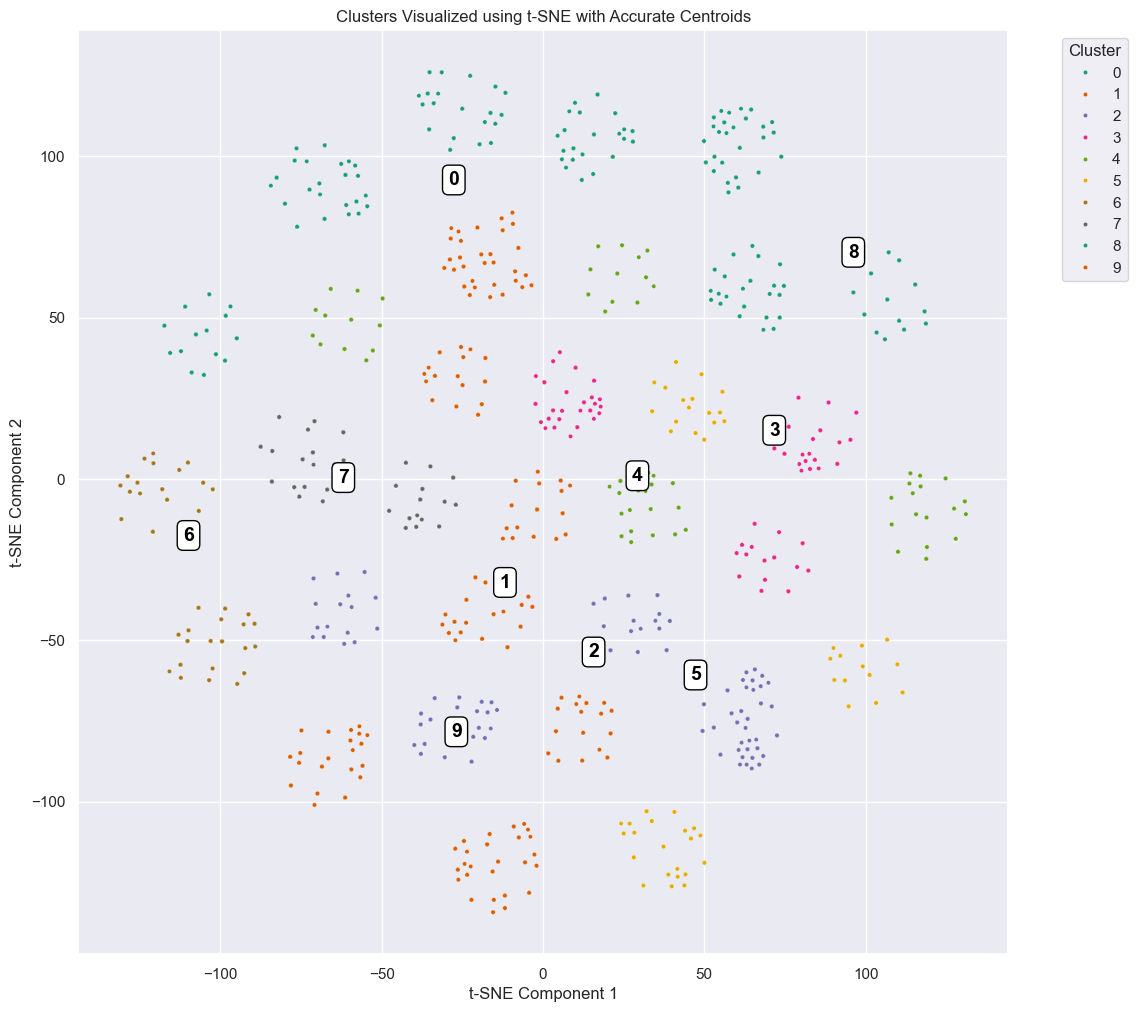

In [27]:
# Compute t-SNE for visualization
tsne = TSNE(n_components=2,perplexity=70,random_state=42)
X_tsne = tsne.fit_transform(gower_dist_selected)

# Convert to DataFrame for easier manipulation
df_tsne = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
df_tsne["Cluster"] = df_selected["Cluster"].values  # Assign cluster labels

# Compute cluster centroids using the median (better than mean for t-SNE)
centroids = df_tsne.groupby("Cluster")[["Component 1", "Component 2"]].median()

# Create t-SNE scatter plot
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df_tsne["Component 1"], y=df_tsne["Component 2"], hue=df_tsne["Cluster"], palette="Dark2", s=10)

# Overlay cluster numbers at centroids (using median positions)
for cluster, (x, y) in centroids.iterrows():
    plt.text(x, y, str(cluster), fontsize=14, fontweight="bold", ha="center", va="center", 
             color="black", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Add labels and title
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Clusters Visualized using t-SNE with Accurate Centroids")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

In [28]:
print(np.isnan(gower_dist_selected).sum())

0


In [29]:
df_selected.groupby("Cluster").agg(lambda x: x.value_counts().index[0])

,Family History,Demographics,Personal History,Gender,Impact on Life,Current Stressors,Substance Use
Cluster,,,,,,,
0,0,Urban,0,Female,1,1,Alcohol
1,0,Rural,0,Male,2,0,Drugs
2,0,Urban,0,Male,1,2,Drugs
3,1,Urban,1,Female,2,1,Drugs
4,1,Urban,0,Male,1,1,Drugs
5,1,Rural,1,Male,2,2,Drugs
6,0,Rural,0,Male,2,1,Alcohol
7,0,Rural,1,Female,0,0,Alcohol
8,1,Urban,0,Female,0,2,Drugs


## Distribución de Features en cada Cluster

In [30]:
c_0 = df_selected[df_selected["Cluster"] == 0]
c_1 = df_selected[df_selected["Cluster"] == 1]
c_2 = df_selected[df_selected["Cluster"] == 2]
c_3 = df_selected[df_selected["Cluster"] == 3]
c_4 = df_selected[df_selected["Cluster"] == 4]
c_5 = df_selected[df_selected["Cluster"] == 5]
c_6 = df_selected[df_selected["Cluster"] == 6]
c_7 = df_selected[df_selected["Cluster"] == 7]
c_8 = df_selected[df_selected["Cluster"] == 8]
c_9 = df_selected[df_selected["Cluster"] == 9]



In [31]:
c_7

,Family History,Demographics,Personal History,Gender,Impact on Life,Current Stressors,Substance Use,Cluster
21639,0,Rural,1,Female,2,1,Alcohol,7
87999,0,Rural,1,Female,2,0,Alcohol,7
6476,0,Urban,1,Female,0,2,Alcohol,7
9359,0,Urban,1,Female,0,0,Alcohol,7
10655,0,Rural,1,Female,1,2,Alcohol,7
...,...,...,...,...,...,...,...,...
5311,0,Rural,1,Female,0,1,Alcohol,7
64925,0,Rural,1,Female,1,0,Alcohol,7
62955,0,Urban,1,Female,0,1,Alcohol,7
60263,0,Urban,1,Female,0,0,Alcohol,7


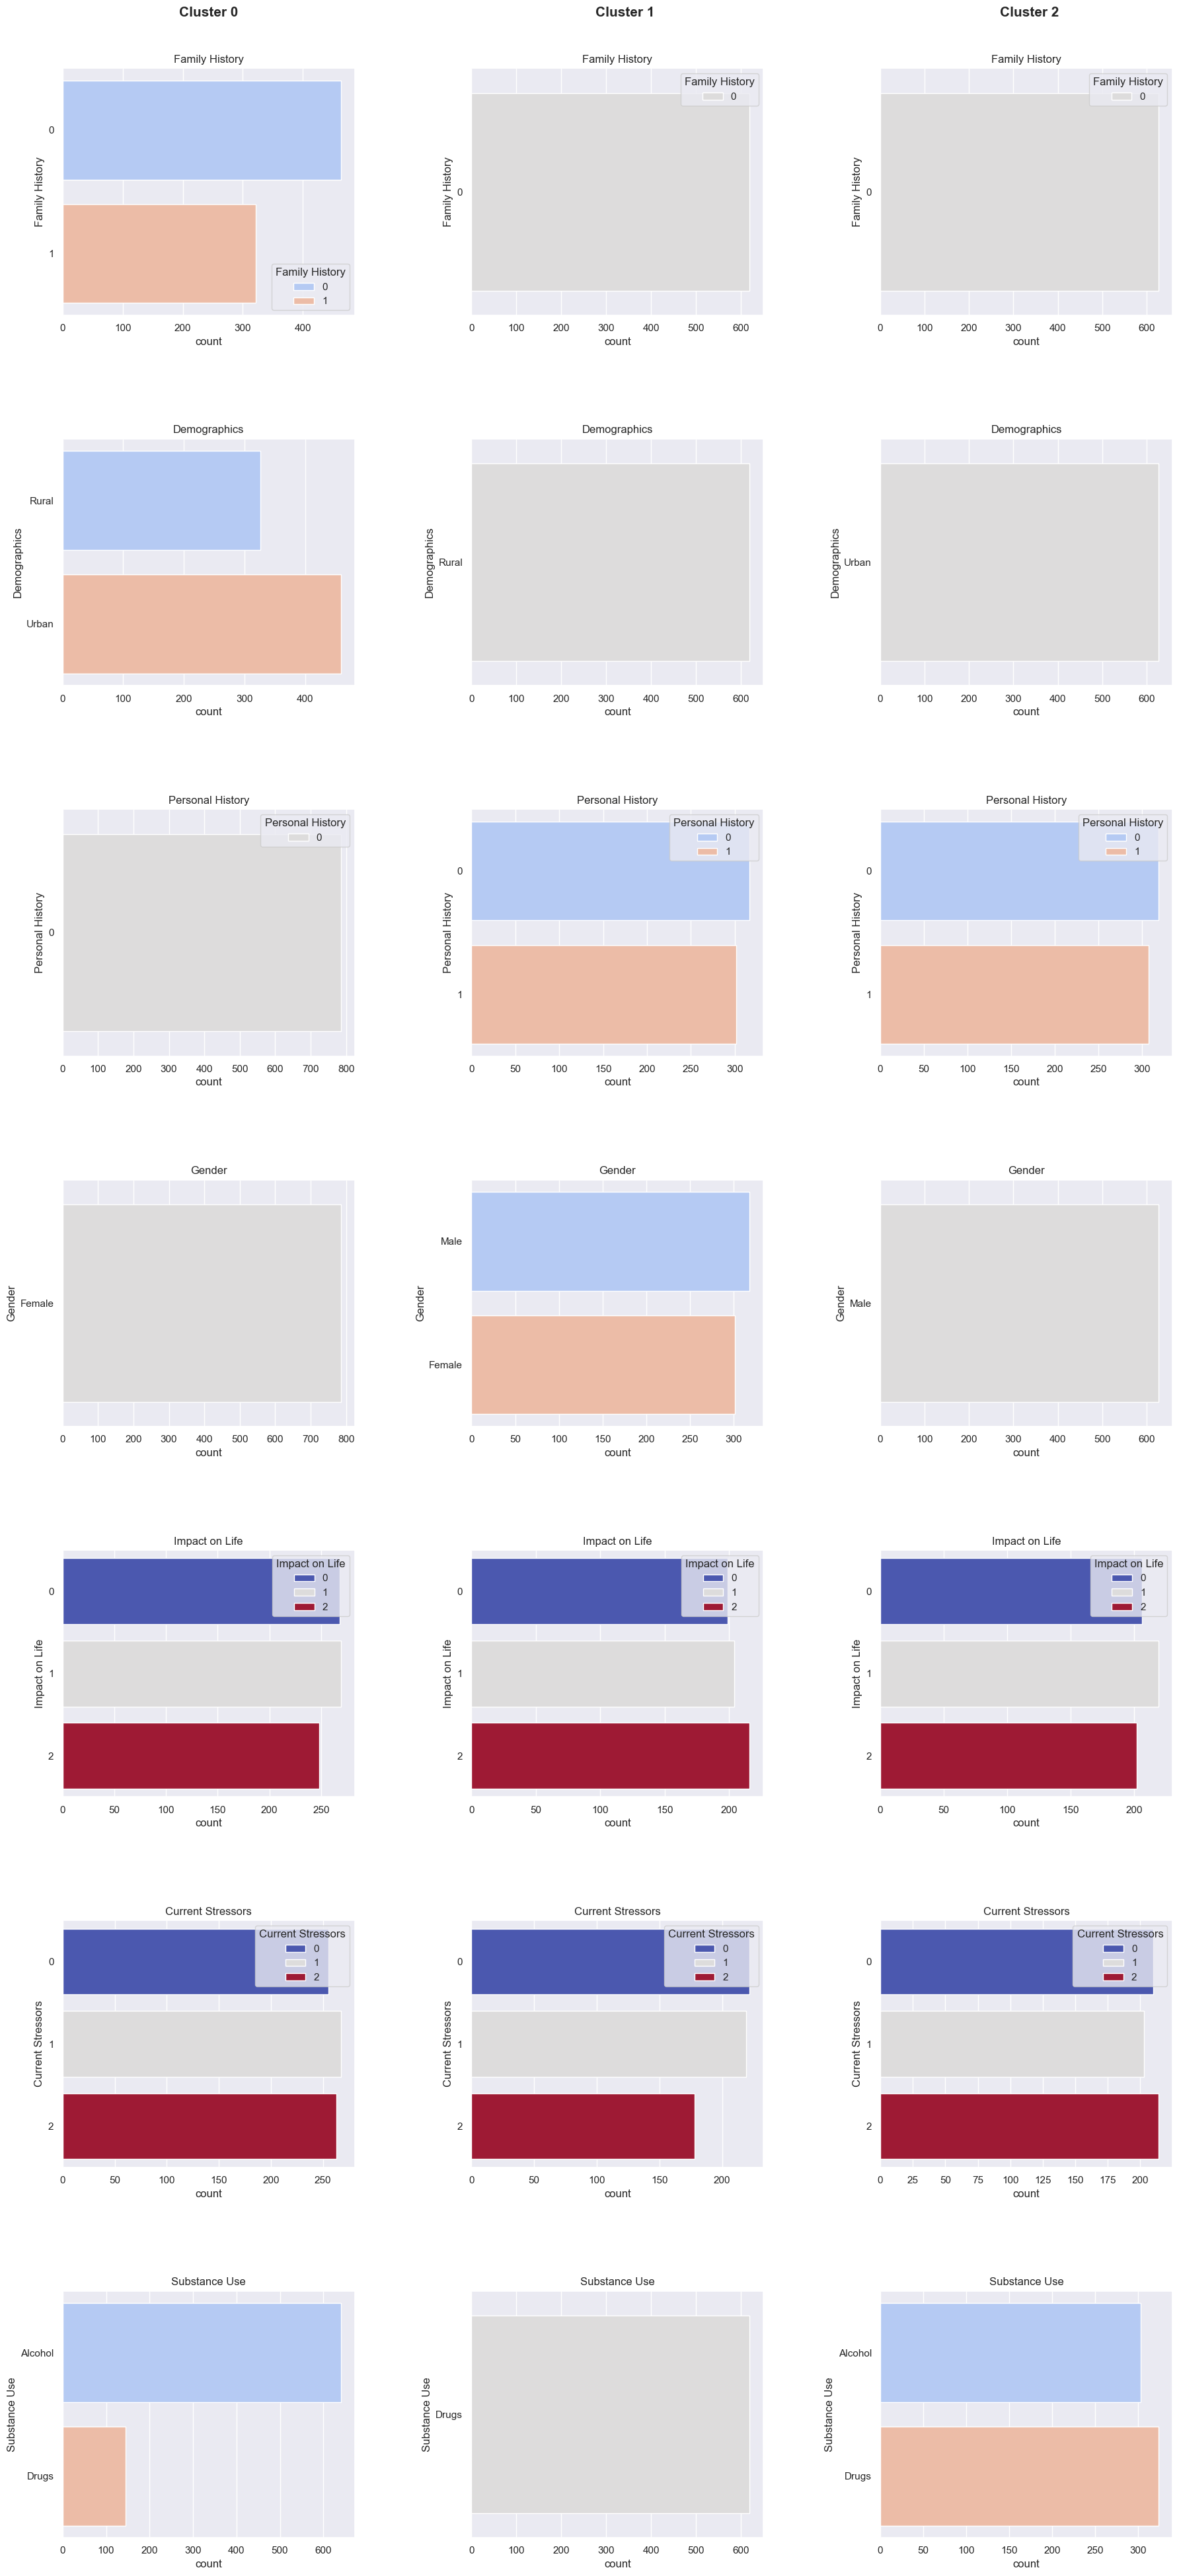

In [32]:
### Distriución de Features
fig,axes = plt.subplots(nrows = 7, ncols=3, figsize = (18,40))
fig.text(0.18,0.97, "Cluster 0", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.53,0.97, "Cluster 1", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.87,0.97, "Cluster 2", ha="center", fontsize=15,fontweight = "bold")

axes = axes.flatten()

for i,column in enumerate(selected_features):
    
    sns.countplot(y=c_0[column],ax=axes[i*3], hue=c_0[column], palette="coolwarm")#, legend=False,order=order)
    axes[i*3].set_title("{}".format(column))
    
    sns.countplot(y=c_1[column],ax=axes[i*3 + 1], hue=c_1[column], palette="coolwarm")#, legend=False, order=order)
    axes[i*3 + 1].set_title("{}".format(column))
    
    sns.countplot(y=c_2[column],ax=axes[i*3 + 2], hue=c_2[column], palette="coolwarm")#, legend=False, order=order)
    axes[i*3 + 2].set_title("{}".format(column))

plt.tight_layout(rect=[0,0,1,0.96])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()

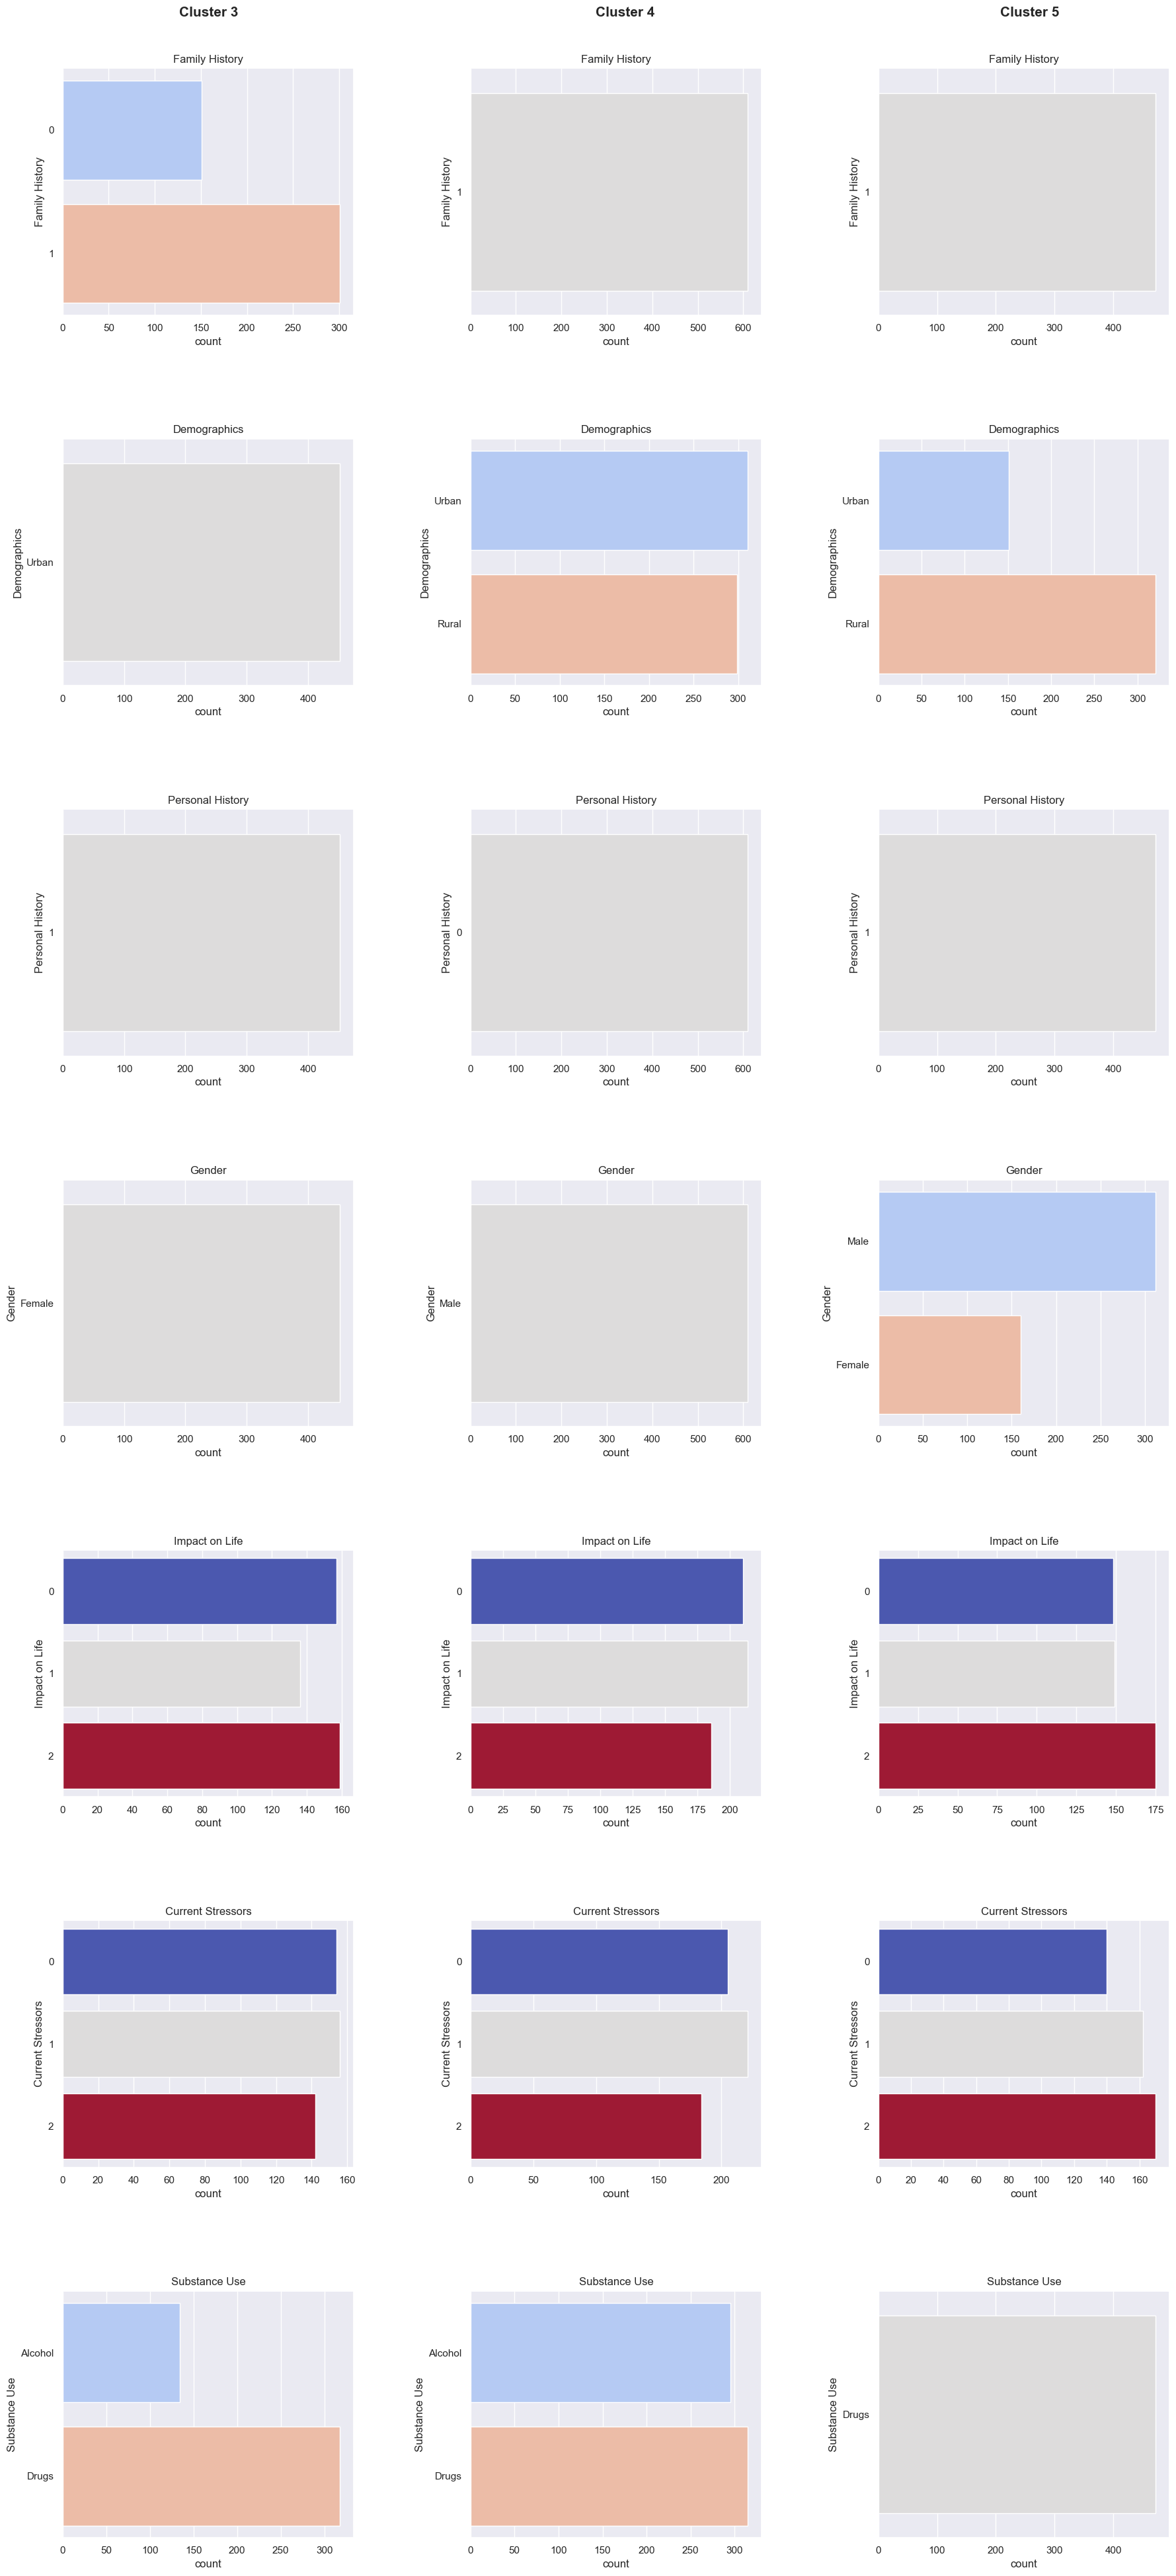

In [33]:
### Distriución de Features
fig,axes = plt.subplots(nrows = 7, ncols=3, figsize = (18,40))
fig.text(0.18,0.97, "Cluster 3", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.53,0.97, "Cluster 4", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.87,0.97, "Cluster 5", ha="center", fontsize=15,fontweight = "bold")

axes = axes.flatten()

for i,column in enumerate(selected_features):
    order = c_3[column].value_counts().index
    sns.countplot(y=c_3[column],ax=axes[i*3], hue=c_3[column], palette="coolwarm", legend=False,)#order=order)
    axes[i*3].set_title("{}".format(column))
    
    sns.countplot(y=c_4[column],ax=axes[i*3 + 1], hue=c_4[column], palette="coolwarm", legend=False)#, order=order)
    axes[i*3 + 1].set_title("{}".format(column))
    
    sns.countplot(y=c_5[column],ax=axes[i*3 + 2], hue=c_5[column], palette="coolwarm", legend=False)#, order=order)
    axes[i*3 + 2].set_title("{}".format(column))

plt.tight_layout(rect=[0,0,1,0.96])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()

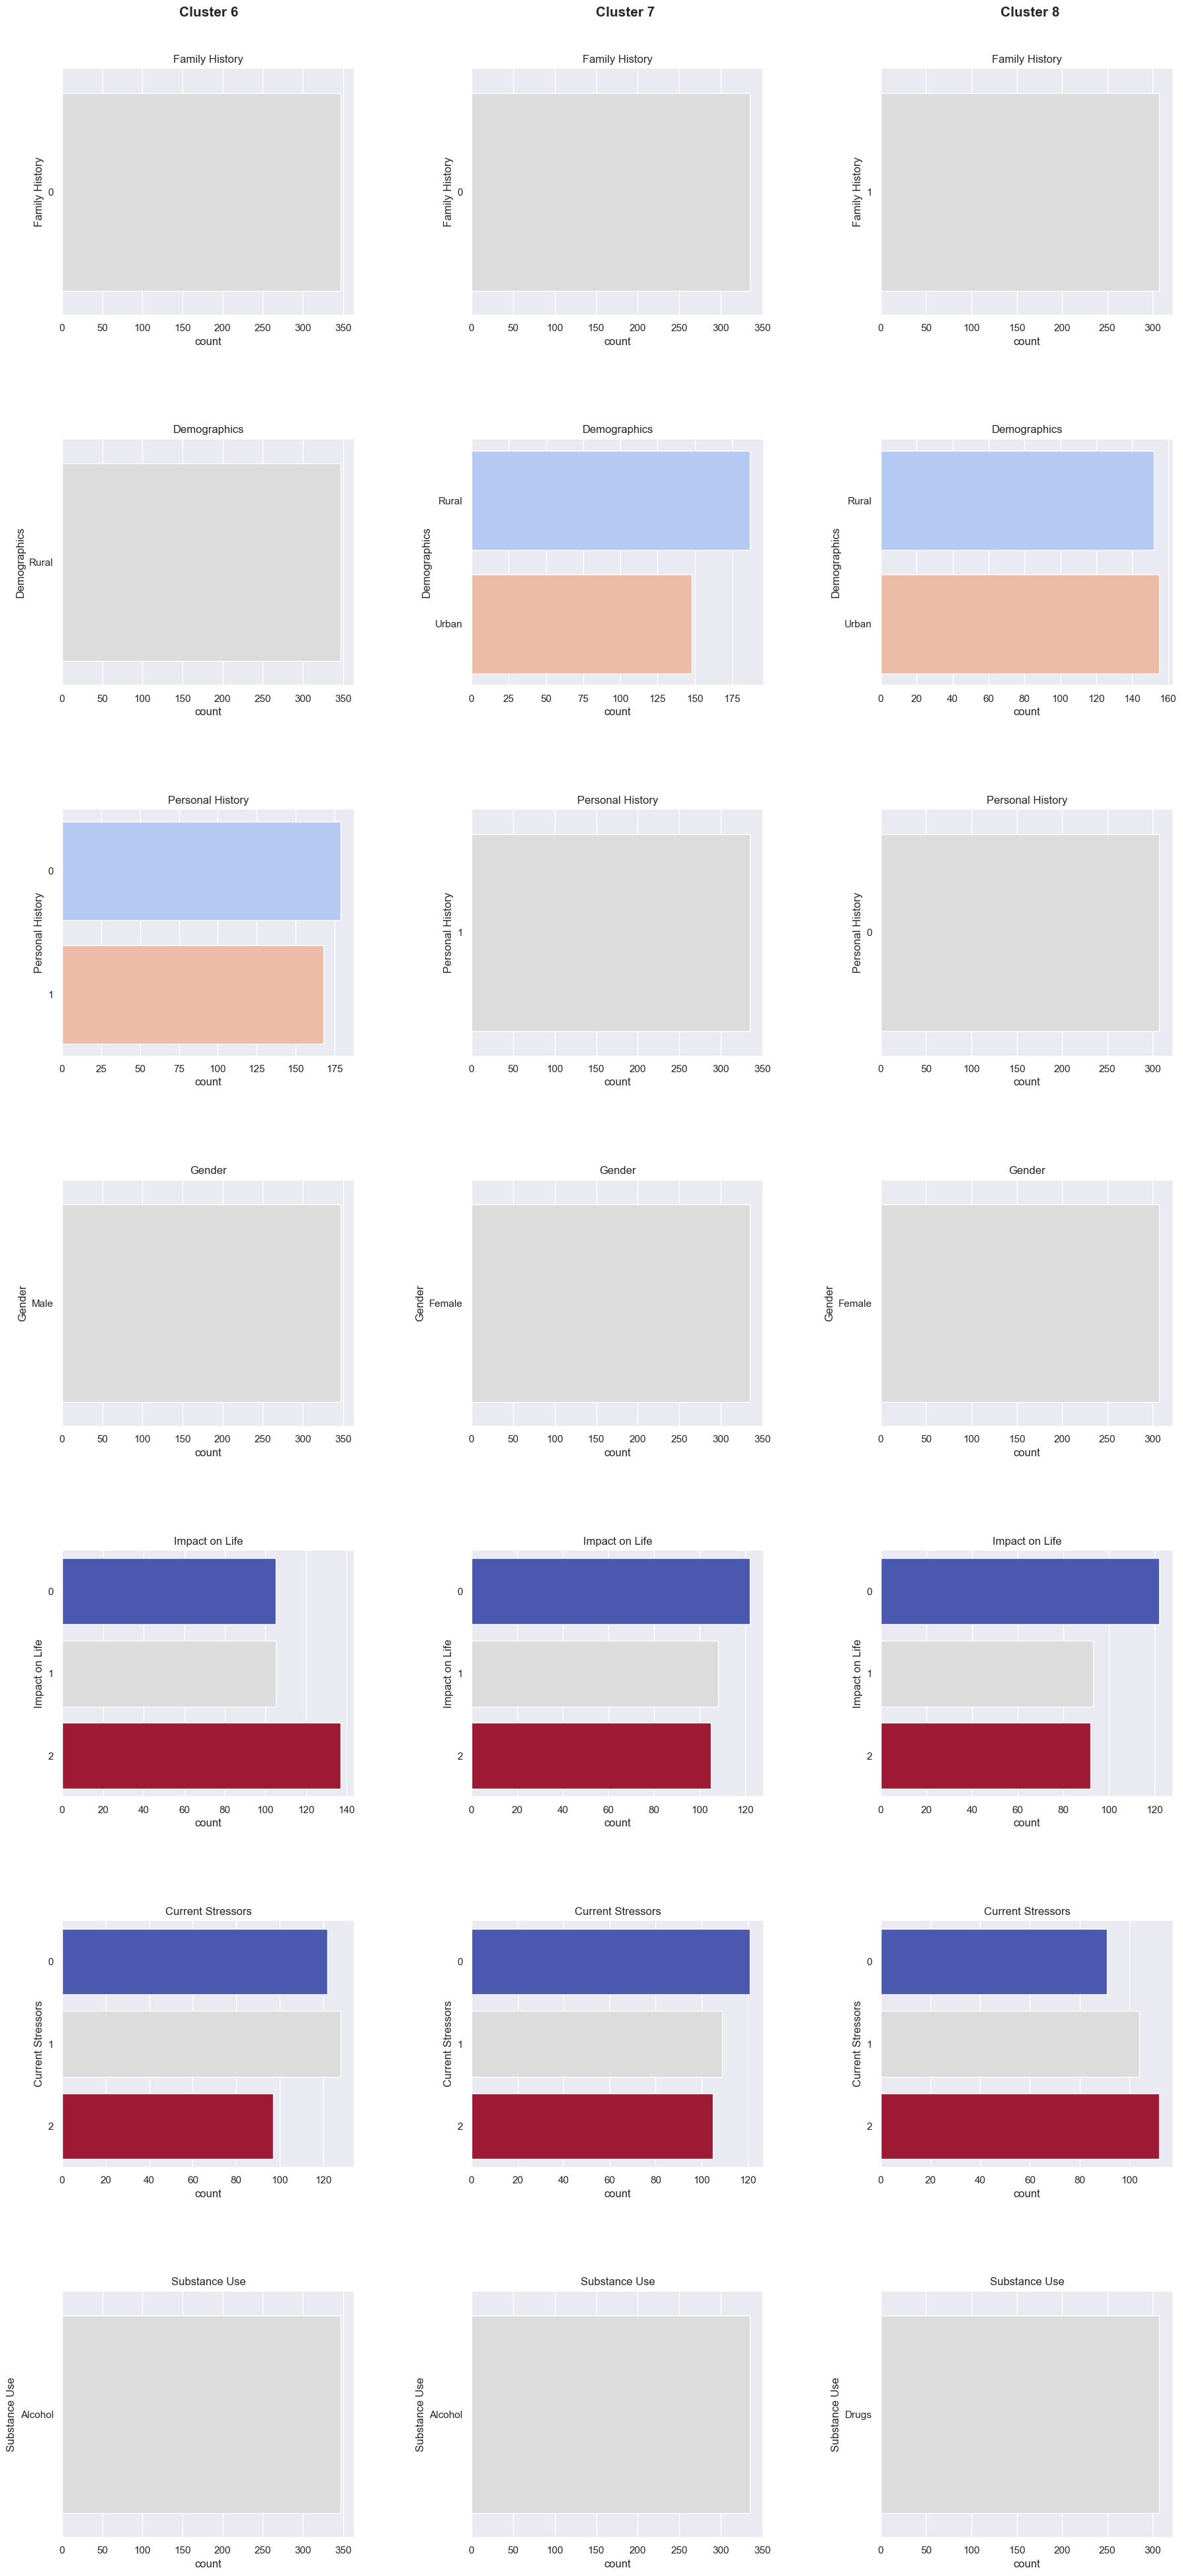

In [34]:
fig,axes = plt.subplots(nrows = 7, ncols=3, figsize = (18,40))
fig.text(0.18,0.97, "Cluster 6", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.53,0.97, "Cluster 7", ha="center", fontsize=15,fontweight = "bold")
fig.text(0.87,0.97, "Cluster 8", ha="center", fontsize=15,fontweight = "bold")

axes = axes.flatten()

for i,column in enumerate(selected_features):
    order = c_6[column].value_counts().index
    sns.countplot(y=c_6[column],ax=axes[i*3], hue=c_6[column], palette="coolwarm", legend=False)#,order=order)
    axes[i*3].set_title("{}".format(column))
    
    sns.countplot(y=c_7[column],ax=axes[i*3 + 1], hue=c_7[column], palette="coolwarm", legend=False)#, order=order)
    axes[i*3 + 1].set_title("{}".format(column))
    
    sns.countplot(y=c_8[column],ax=axes[i*3 + 2], hue=c_8[column], palette="coolwarm", legend=False)#, order=order)
    axes[i*3 + 2].set_title("{}".format(column))

plt.tight_layout(rect=[0,0,1,0.96])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()

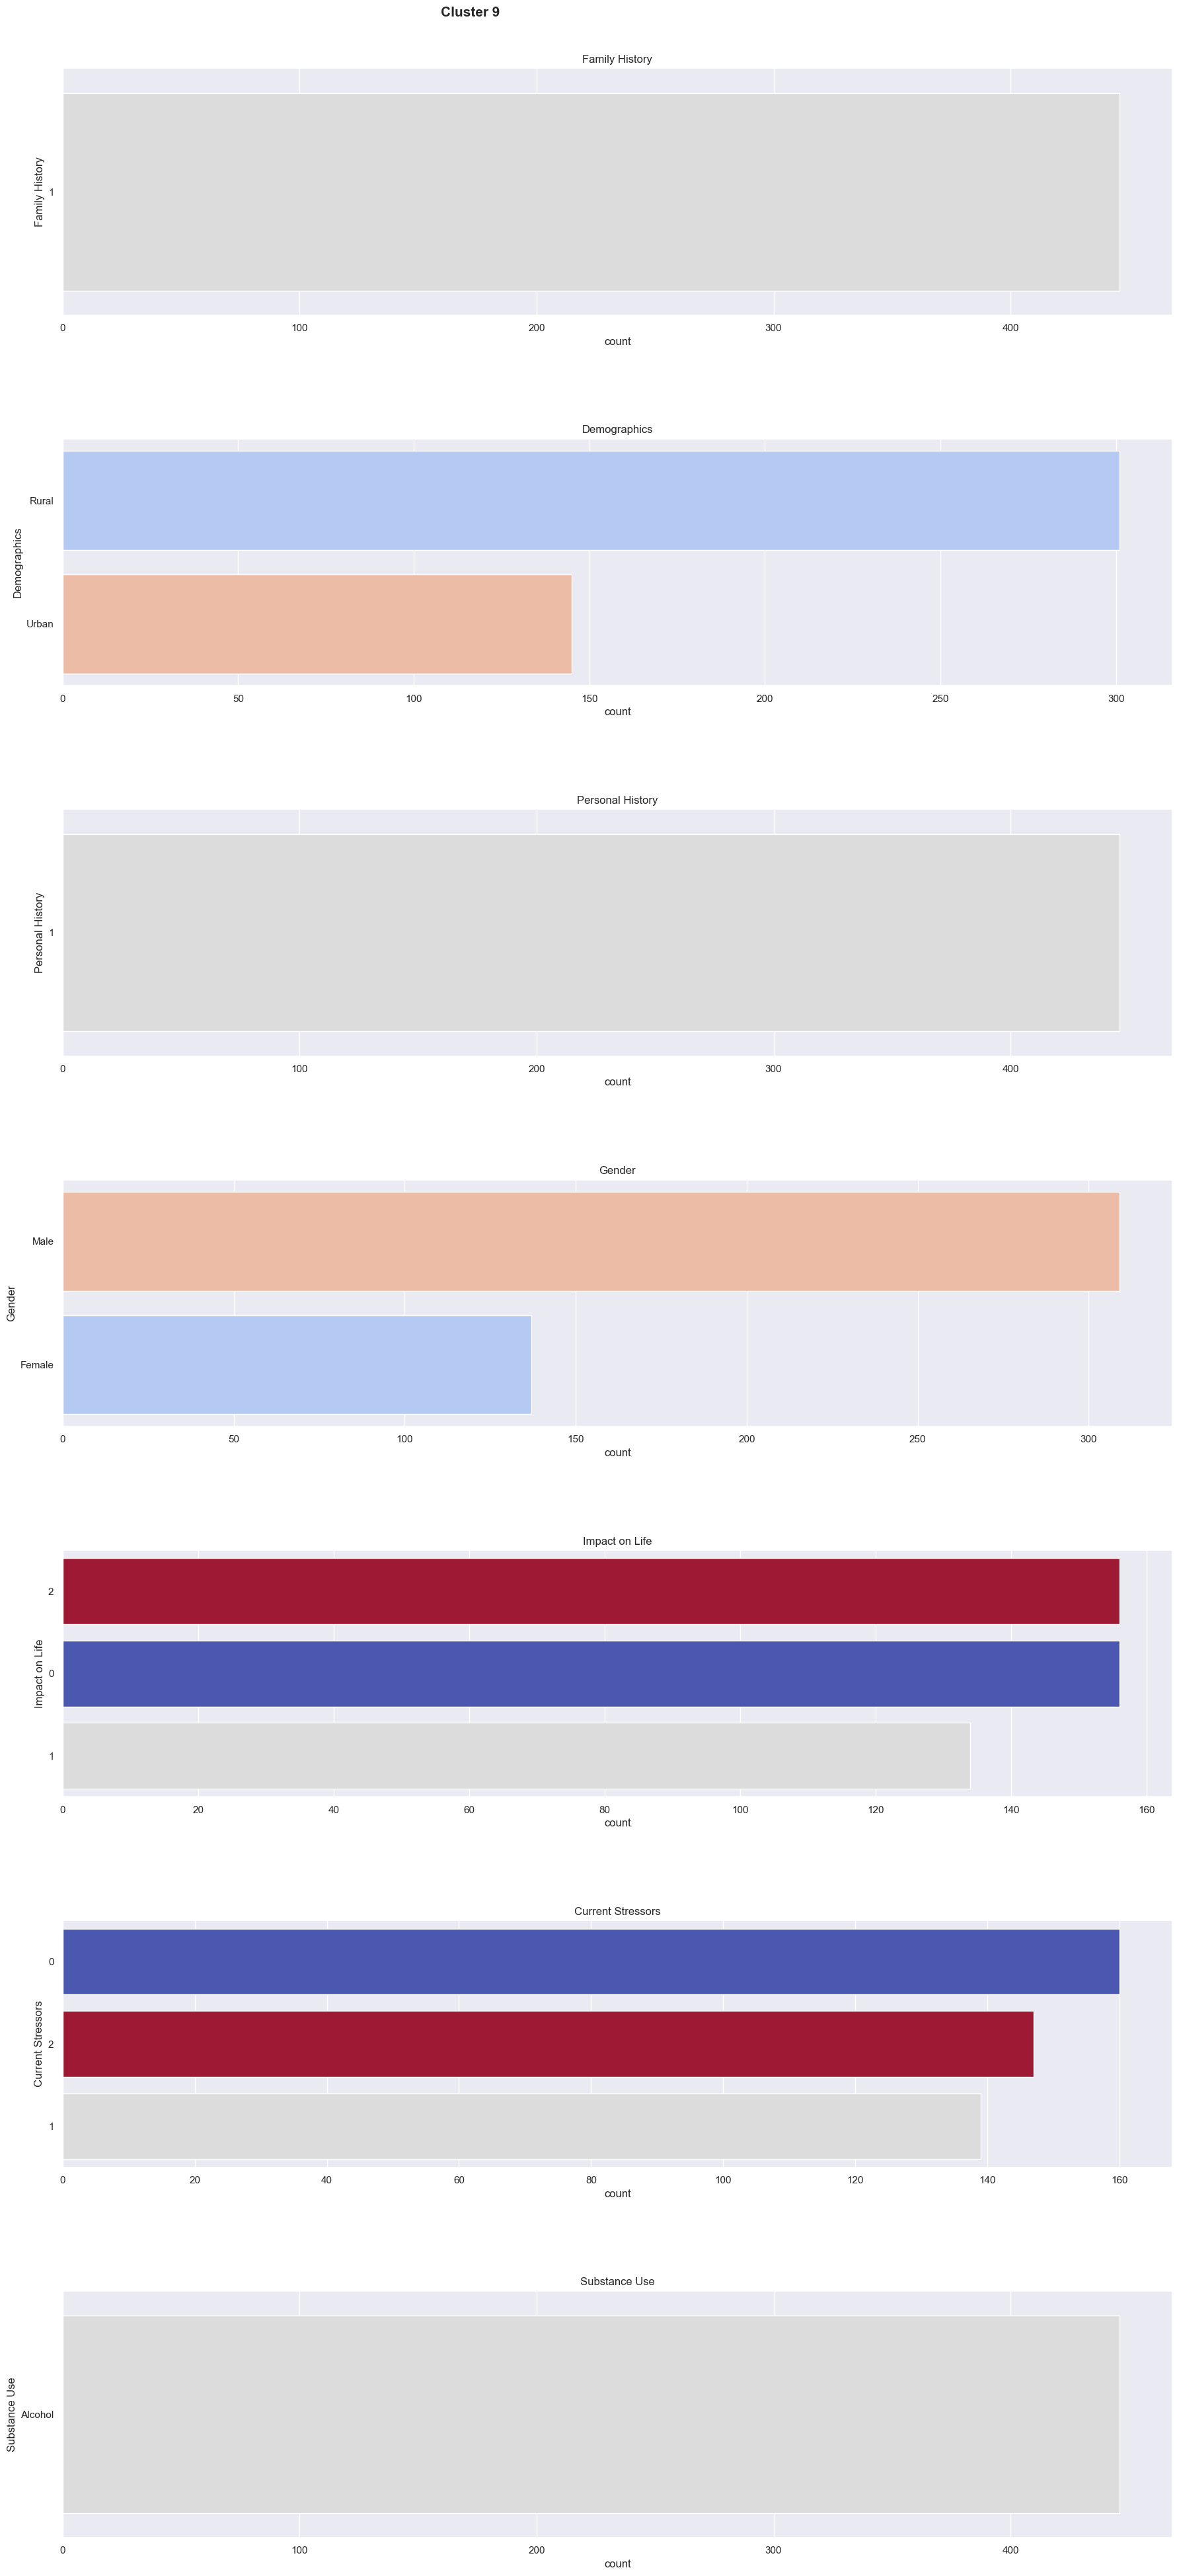

In [35]:
fig,axes = plt.subplots(nrows = 7, ncols=1, figsize = (18,40))

fig.text(0.40,0.97, "Cluster 9", ha="center", fontsize=15,fontweight = "bold")


axes = axes.flatten()

for i,column in enumerate(selected_features):
    order = c_9[column].value_counts().index
    sns.countplot(y=c_9[column],ax=axes[i], hue=c_9[column], palette="coolwarm", legend=False,order=order)
    axes[i].set_title("{}".format(column))
    


plt.tight_layout(rect=[0,0,1,0.96])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()